# k.likhith
# 2211cs010309
# Car_price_prediction

In [ ]:
# Car Price Dataset Description
# The Car Price Dataset contains information about various used cars, including their features and prices. It helps analyze factors affecting car prices, such as brand, year, mileage, fuel type, and transmission.

# Dataset Overview:
Total Entries: 10,000 (approx.)

Total Columns: 10

# Column Descriptions:
# Brand – The manufacturer of the car (e.g., Toyota, BMW, Ford).

# Model – The specific model of the car (e.g., Corolla, Mustang).

Year – The year the car was manufactured.

Engine_Size – Engine capacity in liters (e.g., 2.0L, 3.5L).

Fuel_Type – Type of fuel the car uses (Petrol, Diesel, Hybrid, Electric).

Transmission – Gear type (Manual, Automatic, Semi-Automatic).

Mileage – Distance the car has traveled (in kilometers).

Doors – Number of doors in the car.

Owner_Count – The number of previous owners.

Price – The selling price of the car (in currency)

In [1]:
import pandas as pd 
df = pd.read_csv("car_price_dataset.csv")
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [2]:
df.columns = df.columns.str.strip()
categorical_cols = ['Brand', 'Model', 'Fuel_Type', 'Transmission']
df_dummies = pd.get_dummies(df[categorical_cols], drop_first=True)
df_final = pd.concat([df.drop(columns=categorical_cols), df_dummies], axis=1)
print(df_final.head())

   Year  Engine_Size  Mileage  Doors  Owner_Count  Price  Brand_BMW  \
0  2020          4.2   289944      3            5   8501      False   
1  2012          2.0     5356      2            3  12092      False   
2  2020          4.2   231440      4            2  11171      False   
3  2023          2.0   160971      2            1  11780      False   
4  2003          2.6   286618      3            3   2867      False   

   Brand_Chevrolet  Brand_Ford  Brand_Honda  ...  Model_Sonata  \
0            False       False        False  ...         False   
1             True       False        False  ...         False   
2            False       False        False  ...         False   
3            False       False        False  ...         False   
4            False       False        False  ...         False   

   Model_Sportage  Model_Tiguan  Model_Tucson  Model_X5  Fuel_Type_Electric  \
0           False         False         False     False               False   
1           False 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style("whitegrid")

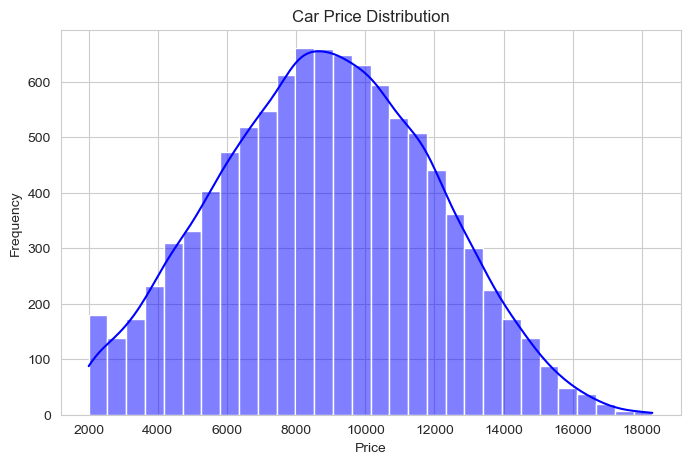

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=30, kde=True, color="blue")
plt.title("Car Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [6]:

most_owned_model = df.groupby("Model")["Owner_Count"].sum().idxmax()
highest_owner_count = df.groupby("Model")["Owner_Count"].sum().max()

print(f"The car model with the highest number of users is {most_owned_model} with {highest_owner_count} total owners.")


The car model with the highest number of users is Fiesta with 1099 total owners.


In [7]:
brand_counts = df['Brand'].value_counts()
brand_counts

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64

C:\Users\likhi\AppData\Local\Temp\ipykernel_13172\4111721367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")


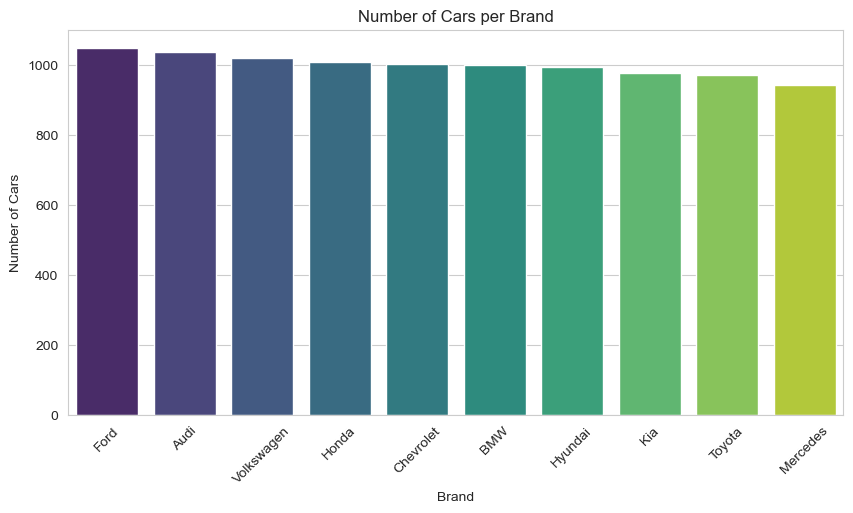

In [8]:
plt.figure(figsize=(10, 5))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Number of Cars")
plt.title("Number of Cars per Brand")
plt.show()

C:\Users\likhi\AppData\Local\Temp\ipykernel_13172\207548254.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values, palette='coolwarm')


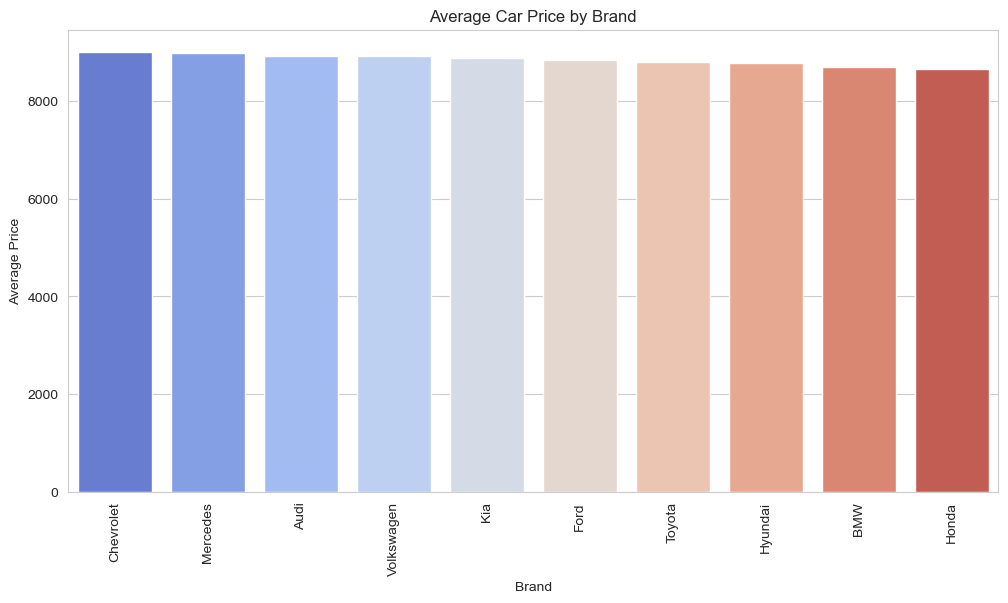

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
avg_price_by_brand = df.groupby("Brand")['Price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.title("Average Car Price by Brand")
plt.show()

C:\Users\likhi\AppData\Local\Temp\ipykernel_13172\1421957402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Fuel_Type"], palette='pastel')


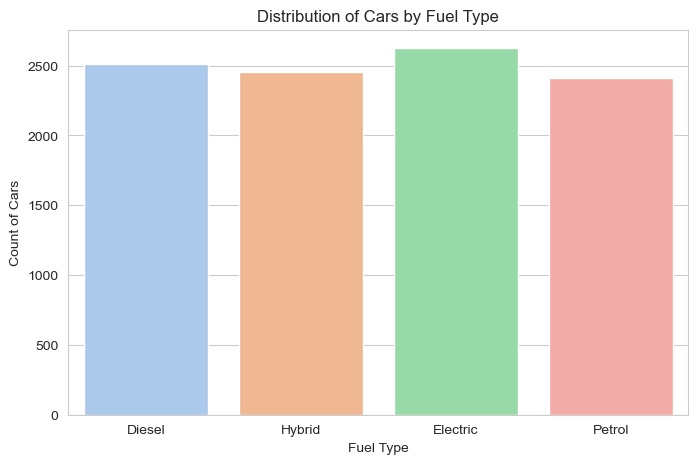

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Fuel_Type"], palette='pastel')
plt.xlabel("Fuel Type")
plt.ylabel("Count of Cars")
plt.title("Distribution of Cars by Fuel Type")
plt.show()

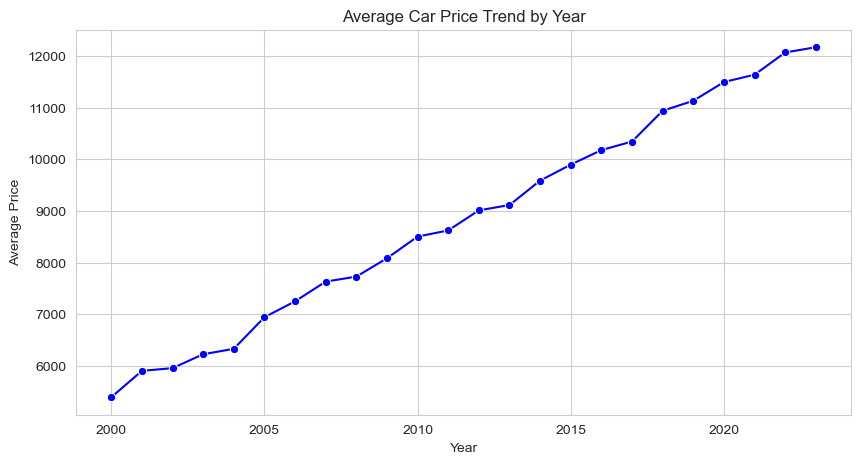

In [11]:
plt.figure(figsize=(10, 5))
avg_price_by_year = df.groupby("Year")['Price'].mean()
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values, marker='o', color='b')
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.title("Average Car Price Trend by Year")
plt.show()

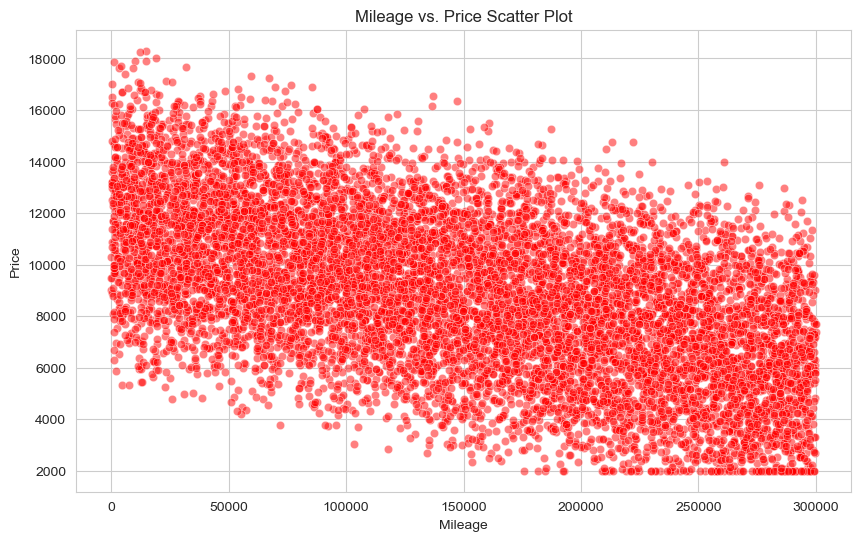

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Mileage'], y=df['Price'], alpha=0.5, color='r')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage vs. Price Scatter Plot")
plt.show()

# Distribution of Car Prices

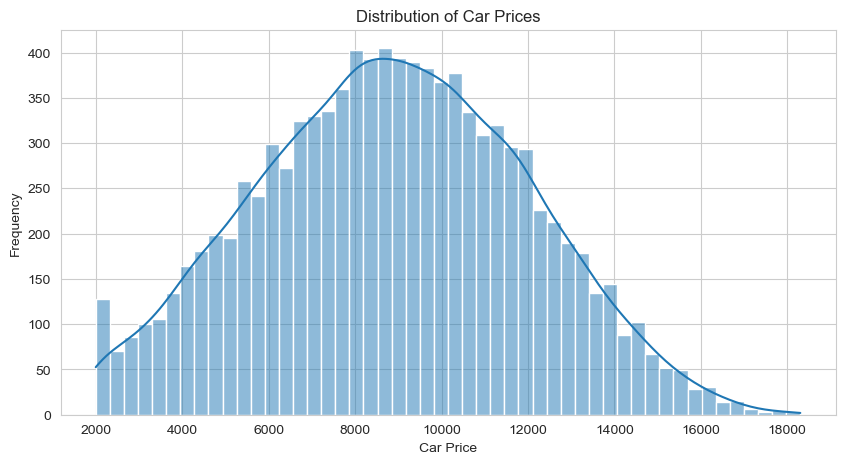

In [17]:
import pandas as pd

# Load the dataset
file_path = "car_price_dataset.csv"  # Replace with the actual file path
df_car = pd.read_csv(file_path)

# Now run the visualization code
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df_car['Price'], bins=50, kde=True)
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.title("Distribution of Car Prices")
plt.show()



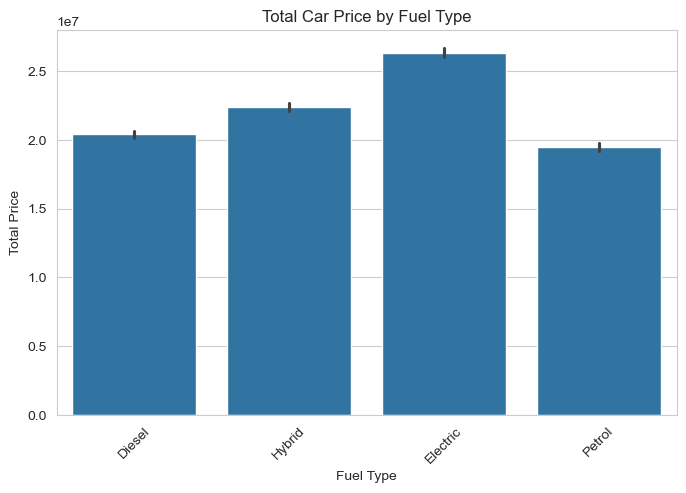

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_car['Fuel_Type'], y=df_car['Price'], estimator=sum)
plt.xlabel("Fuel Type")
plt.ylabel("Total Price")
plt.title("Total Car Price by Fuel Type")
plt.xticks(rotation=45)
plt.show()


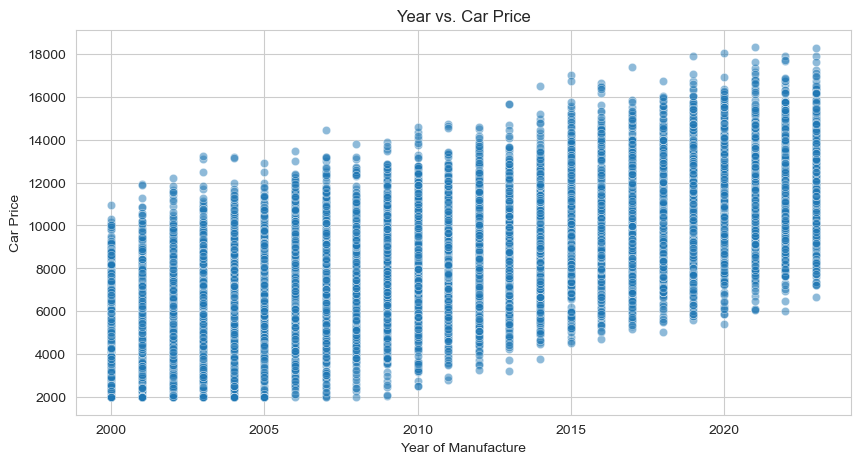

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_car['Year'], y=df_car['Price'], alpha=0.5)
plt.xlabel("Year of Manufacture")
plt.ylabel("Car Price")
plt.title("Year vs. Car Price")
plt.show()


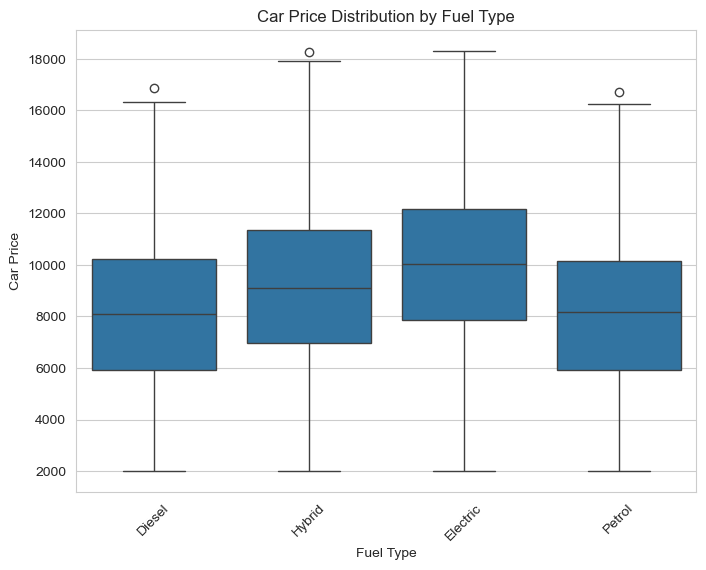

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_car['Fuel_Type'], y=df_car['Price'])
plt.xlabel("Fuel Type")
plt.ylabel("Car Price")
plt.title("Car Price Distribution by Fuel Type")
plt.xticks(rotation=45)
plt.show()


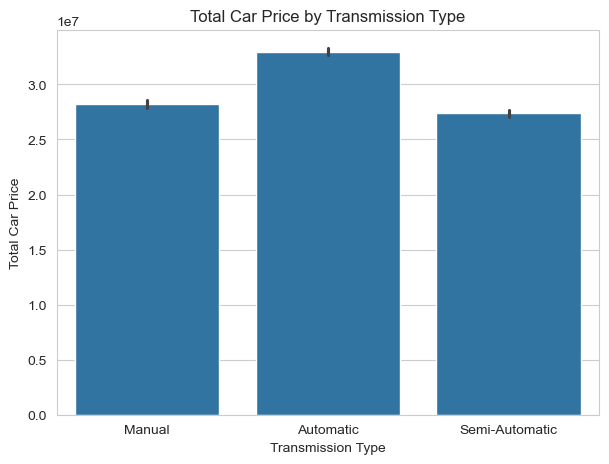

In [27]:
plt.figure(figsize=(7, 5))
sns.barplot(x=df_car['Transmission'], y=df_car['Price'], estimator=sum)
plt.xlabel("Transmission Type")
plt.ylabel("Total Car Price")
plt.title("Total Car Price by Transmission Type")
plt.show()


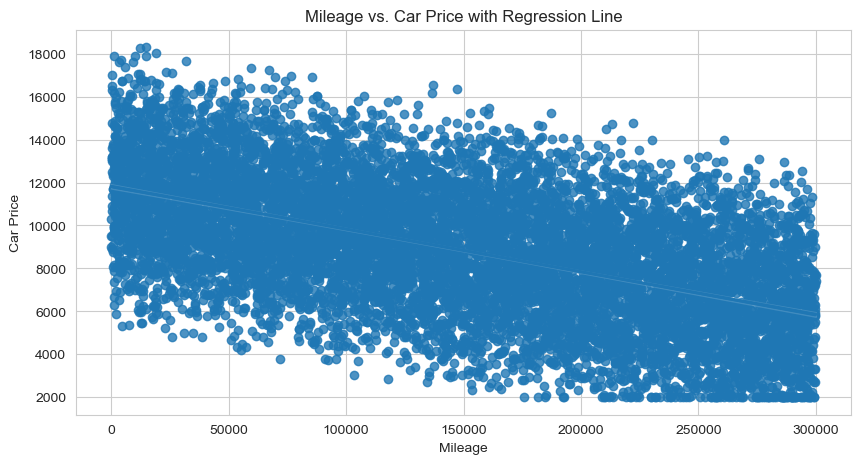

In [29]:
plt.figure(figsize=(10,5))
sns.regplot(x=df_car['Mileage'], y=df_car['Price'])
plt.xlabel("Mileage")
plt.ylabel("Car Price")
plt.title("Mileage vs. Car Price with Regression Line")
plt.show()


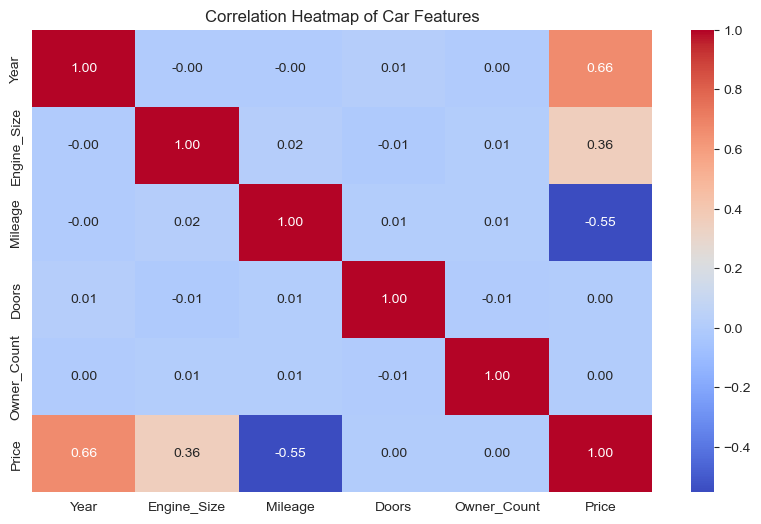

In [31]:
import numpy as np

plt.figure(figsize=(10, 6))
corr = df_car.corr(numeric_only=True)  # Ensure only numerical columns
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Car Features")
plt.show()


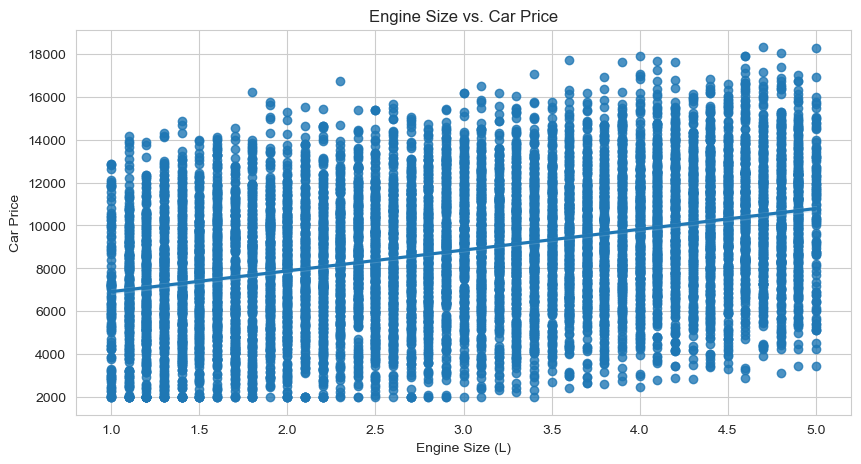

In [33]:
plt.figure(figsize=(10, 5))
sns.regplot(x=df_car['Engine_Size'], y=df_car['Price'])
plt.xlabel("Engine Size (L)")
plt.ylabel("Car Price")
plt.title("Engine Size vs. Car Price")
plt.show()


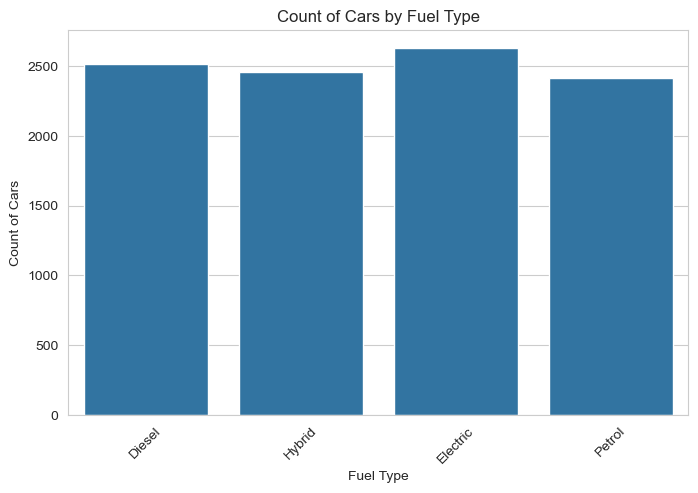

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df_car['Fuel_Type'])
plt.xlabel("Fuel Type")
plt.ylabel("Count of Cars")
plt.title("Count of Cars by Fuel Type")
plt.xticks(rotation=45)
plt.show()


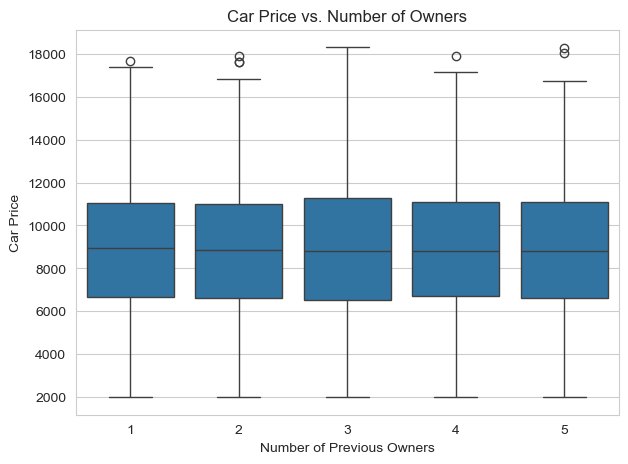

In [37]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df_car['Owner_Count'], y=df_car['Price'])
plt.xlabel("Number of Previous Owners")
plt.ylabel("Car Price")
plt.title("Car Price vs. Number of Owners")
plt.show()
